In [48]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast 
import matplotlib.ticker as mtick


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [52]:
df_explode = df.explode('job_skills')
df_explode = df_explode[df_explode['job_country'] == "United States"].groupby(['job_title_short','job_skills']).size()
df_explode = df_explode.reset_index(name = 'skill_count')
df_explode = df_explode.sort_values('skill_count', ascending=False)
df_job_skills_us = df_explode
df_explode =df_explode[df_explode['job_title_short'] == "Data Scientist"].head(10)
top_skills = df_explode.sort_values('skill_count', ascending=True)  # Sort in ascending order for better visualization in horizontal bar chart
top_skills



,job_title_short,job_skills,skill_count
752,Data Scientist,azure,6878
933,Data Scientist,tensorflow,7039
823,Data Scientist,java,7335
916,Data Scientist,spark,9890
751,Data Scientist,aws,10288
932,Data Scientist,tableau,13859
902,Data Scientist,sas,14340
890,Data Scientist,r,26022
921,Data Scientist,sql,30034
886,Data Scientist,python,42379


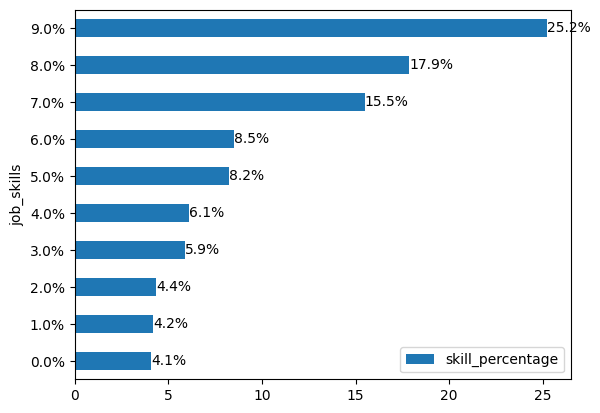

In [49]:
total_skill_count = top_skills['skill_count'].sum()
top_skills['skill_percentage'] = top_skills['skill_count'].apply(lambda x: (x / total_skill_count) * 100)
labels = top_skills['skill_percentage'].round(1).astype('str') + '%'
ax = top_skills.plot.barh(x='job_skills', y='skill_percentage')

for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())    #from @Quinten


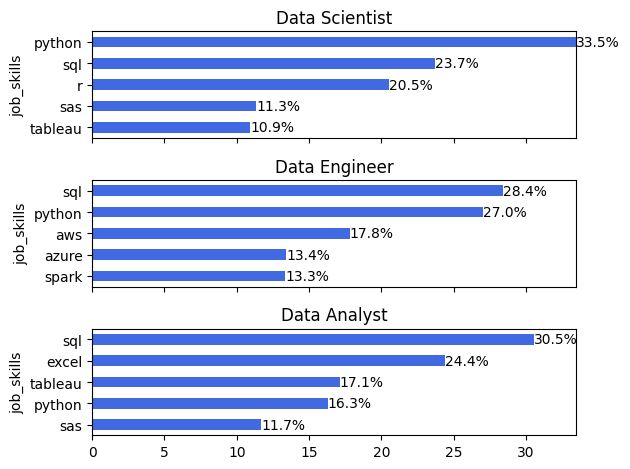

In [104]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
job_titles = df_job_skills_us['job_title_short'].value_counts().head(3).index.to_list()

# Find the maximum skill percentage across all job titles
max_percentage = 0
for i, title in enumerate(job_titles):
    df_title = df_job_skills_us[df_job_skills_us['job_title_short'] == title].head(5)
    df_title = df_title.sort_values('skill_count', ascending=True)
    df_title['skill_percentage'] = df_title['skill_count'].apply(lambda x: (x / df_title['skill_count'].sum()) * 100)
    labels = df_title['skill_percentage'].round(1).astype('str') + '%'
    xas = df_title.plot(kind='barh', x='job_skills', y='skill_percentage', ax=ax[i], title=title, color='royalblue')
    max_percentage = max(max_percentage, df_title['skill_percentage'].max())
    xas.set_xlim(0, max_percentage)  # Set the x-axis limit to the maximum percentage
    ax[i].get_legend().remove()
    for container in xas.containers:
        xas.bar_label(container, labels=labels, bbox=None)

fig.tight_layout()
plt.show()